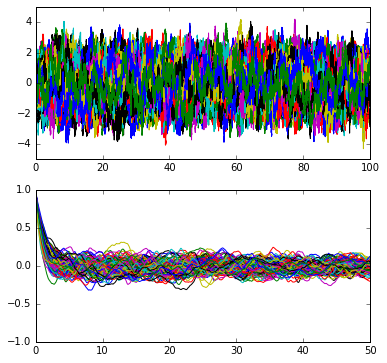

In [1]:
import numpy as np
#import matplotlib
#matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt

% matplotlib inline





num_sims = 100 ### display five runs

t_init = 0
t_end  = 100

y_init = 0
N      = 50000 ### Compute 1000 grid points 

tau=1
amp=tau


dt    = float(t_end - t_init) / N
ts    = np.arange(t_init, t_end, dt)
ys    = np.zeros(N)

ys[0] = y_init
plt.figure(figsize=(6,6))

ax0 = plt.subplot(211)
ax1 = plt.subplot(212,ylim=[-1,1])

acor_all = []
for i_sim in range(num_sims):
    for i in range(1, ts.size):
        standnorm = np.random.normal(loc = 0.0, scale = np.sqrt(1))
        ys[i] = ys[i-1]*np.exp(-1*dt/tau)+np.sqrt((1-np.exp(-2*dt/tau))*amp/tau)*standnorm
    yunbiased = ys-np.mean(ys)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "same")/ynorm
    # use only second half
    acor = acor[len(acor)/2:]
    acor_all.append(acor.tolist())


    ax0.plot(np.arange(len(ys))*dt, ys)
    ax1.plot(np.arange(len(acor))*dt, acor)
plt.show()


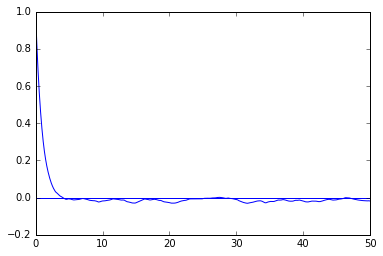

In [7]:
acor_all = np.array(acor_all)
plt.plot(np.arange(len(acor))*dt, acor_all.mean(0),'-')
plt.axhline(0)

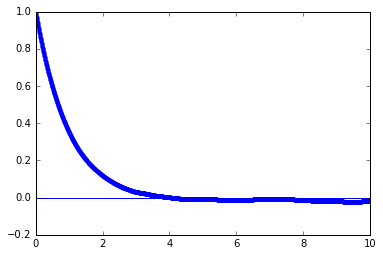

In [4]:
plt.subplot(111,xlim=[0,10])
acor_all = np.array(acor_all)
plt.plot(np.arange(len(acor))*dt, acor_all.mean(0),'.')
plt.axhline(0)